# Q1. Is it true that the home team is more likely to win?

We begin by initializing the CSV file. It is necessary to check its content and adapt it to our needs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

df = pd.read_csv('../laliga.csv')
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,NaN,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,NaN,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,NaN,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,NaN,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,NaN,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,NaN,Real Oviedo,UD Ibiza,NaN
48776,2021-2022,2,42,5/29/22,NaN,Real Sociedad B,Real Zaragoza,NaN
48777,2021-2022,2,42,5/29/22,NaN,Sporting Gijón,UD Las Palmas,NaN
48778,2021-2022,2,42,5/29/22,NaN,CD Tenerife,FC Cartagena,NaN


The necessary information is contained within the score column. Its information can be broken into two new columns, home goals and away goals, for better handling. And additional result column that uses the 1, 2 or X format can also be added.

In [11]:
df["local_score"] = df["score"].str.split(":").str[0]
df["away_score"] = df["score"].str.split(":").str[1]
df['results'] = df.apply(lambda row: 1 if row['local_score'] > row['away_score'] else (2 if row['away_score'] > row['local_score'] else ('X' if row['local_score'] == row['away_score'] else None)), axis=1)
df

,season,division,matchday,date,time,home_team,away_team,score,local_score,away_score,results
0,1928-1929,1,1,2/10/29,NaN,Arenas Club,Athletic Madrid,2:3,2,3,2
1,1928-1929,1,1,2/10/29,NaN,Espanyol,Real Unión,3:2,3,2,1
2,1928-1929,1,1,2/10/29,NaN,Real Madrid,Catalunya,5:0,5,0,1
3,1928-1929,1,1,2/10/29,NaN,Donostia,Athletic,1:1,1,1,X
4,1928-1929,1,1,2/12/29,NaN,Racing,Barcelona,0:2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,NaN,Real Oviedo,UD Ibiza,NaN,NaN,NaN,None
48776,2021-2022,2,42,5/29/22,NaN,Real Sociedad B,Real Zaragoza,NaN,NaN,NaN,None
48777,2021-2022,2,42,5/29/22,NaN,Sporting Gijón,UD Las Palmas,NaN,NaN,NaN,None
48778,2021-2022,2,42,5/29/22,NaN,CD Tenerife,FC Cartagena,NaN,NaN,NaN,None


In [4]:
result_counts = df['results'].value_counts()
result_counts

results
1    25317
X    12280
2    10403
Name: count, dtype: int64

We can see that the amount of times the local team wins is way higher than the ties or defeats. So we can cocnlude that it is true that the local team is more likely to win. Now we can plot the corresponding data.

<Axes: ylabel='Match results'>

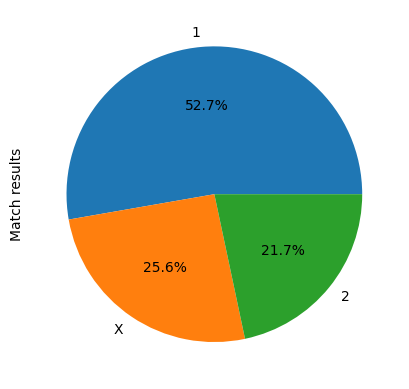

In [12]:
result_counts.plot(kind='pie', label ='Match results', autopct = '%1.1f%%')

As the results indicate, the local team wins more than half of the matches. Also, it is slightly more likely for the result to be a tie rather than a defeat of the local team.

# Q2. What are the top ten scoring teams of all time? What are the ten teams that concede the most? What have been the biggest wins?

We can use the columns created in the previous exercise for this one too. First, we will sum all the scored goals as a local for each team. We will do the same for away goals and sum them up.

Text(0.5, 1.0, 'Top 10 goal scorers')

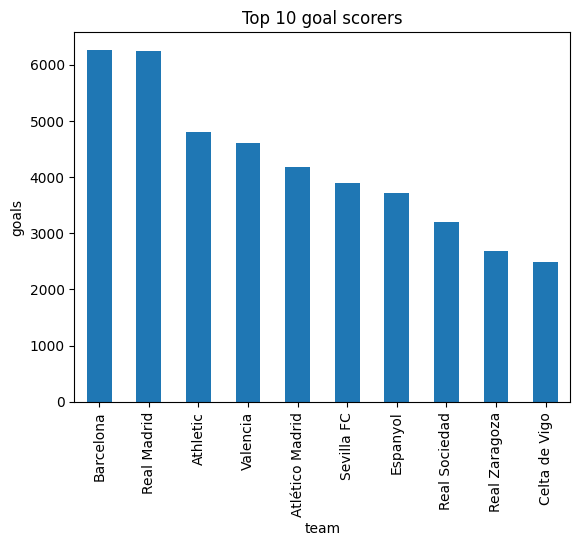

In [58]:

df = df.dropna(subset=['local_score'])
df = df.dropna(subset=['away_score'])
df = df[df['division'] == 1]
df['local_score'] = df['local_score'].astype(int)
df['away_score'] = df['away_score'].astype(int)
total_goals = df.groupby('home_team')['local_score'].sum().reset_index()
total_goals = total_goals.rename(columns={'home_team':'team', 'local_score':'goals'})
away_goals = df.groupby('away_team')['away_score'].sum().reset_index()
total_goals['goals'] += away_goals['away_score']
top10goals = total_goals.sort_values(by='goals', ascending=False).reset_index(drop=True).head(10)
top10goals.plot(x='team', y='goals', kind='bar', legend=False)
plt.xlabel('team')
plt.ylabel('goals')
plt.title('Top 10 goal scorers')

As expected, Barcelona and Real Madrid are the teams that have scored the most goals. Followed by Athletic which has never descended into second division. Now we repeat the process for the conceaded goals.

Text(0.5, 1.0, 'Top 10 goal conceders')

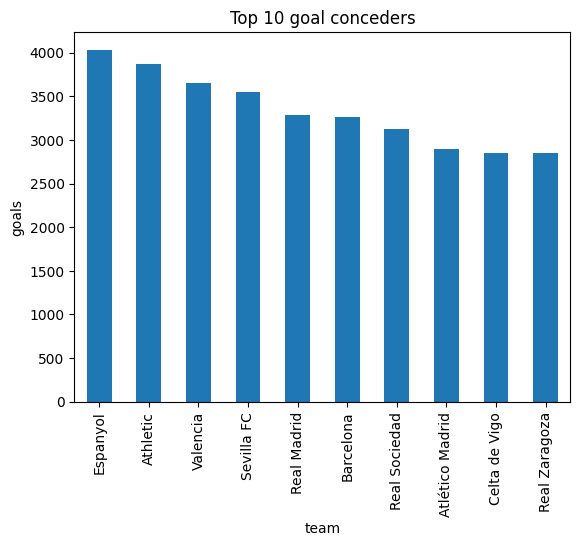

In [59]:
total_conceded = df.groupby('home_team')['away_score'].sum().reset_index()
total_conceded = total_conceded.rename(columns={'home_team':'team', 'away_score':'conceded goals'})
away_conceded = df.groupby('away_team')['local_score'].sum().reset_index()
total_conceded['conceded goals'] += away_conceded['local_score']
top10conceded = total_conceded.sort_values(by='conceded goals', ascending=False).reset_index(drop=True).head(10)
top10conceded.plot(x='team', y='conceded goals', kind='bar', legend=False)
plt.xlabel('team')
plt.ylabel('goals')
plt.title('Top 10 goal conceders')

The team that has conceded the most goals is Espanyol, this makes sense because it is a team that has spent many seasons in first division but is not one of the stronger teams.

In order to find out the biggest win, we will create another column called goal difference, which will be the difference between the local team goals and the away team goals. Another column with the absolute value is also necessary because the value would be negative if the match is a victory for the away team.

In [63]:
df['goal_diff'] = df['local_score'] - df['away_score']
df['abs_goal_diff'] = np.abs(df['goal_diff'])
df.sort_values(by = 'abs_goal_diff', ascending=False).reset_index(drop=True).head(10)

,season,division,matchday,date,time,home_team,away_team,score,local_score,away_score,results,goal_diff,abs_goal_diff
0,1930-1931,1,10,2/8/31,NaN,Athletic,Barcelona,12:1,12,1,1,11,11
1,1940-1941,1,1,9/29/40,NaN,Sevilla FC,Barcelona,11:1,11,1,1,10,10
2,1950-1951,1,11,11/19/50,NaN,Athletic,Lérida,10:0,10,0,1,10,10
3,1941-1942,1,15,1/11/42,NaN,Athletic,Celta de Vigo,10:0,10,0,1,10,10
4,1941-1942,1,1,9/28/41,NaN,Sevilla FC,Real Oviedo,10:0,10,0,1,10,10
5,1953-1954,1,26,3/28/54,NaN,Barcelona,Real Oviedo,9:0,9,0,1,9,9
6,1978-1979,1,16,1/14/79,NaN,Barcelona,Rayo Vallecano,9:0,9,0,1,9,9
7,1932-1933,1,10,1/29/33,NaN,Racing,Alavés,9:0,9,0,1,9,9
8,1959-1960,1,21,2/7/60,NaN,Real Madrid,Elche CF,11:2,11,2,2,9,9
9,1955-1956,1,1,9/11/55,NaN,Atlético Madrid,Hércules CF,9:0,9,0,1,9,9


These are the 10 biggest victories in the history of the first division of LaLiga.

# Q3. How have LaLiga's television rights changed game schedules in the last years?

To answer this, first we will create a new set that only contains the games that have a valid value for the time.

In [65]:
q3 = df
q3 = q3.dropna(subset=['time'])
q3.value_counts('time')

time
5:00 PM     1434
9:00 PM     1072
8:00 PM      828
6:00 PM      721
7:00 PM      689
10:00 PM     625
6:30 PM      371
8:45 PM      309
12:00 PM     281
4:00 PM      270
4:15 PM      237
9:30 PM      235
8:30 PM      214
7:30 PM      147
1:00 PM      115
6:15 PM       94
2:00 PM       90
11:00 PM      35
8:15 PM       30
10:05 PM      29
5:30 PM       28
7:45 PM       20
10:15 PM      18
10:30 PM       9
7:50 PM        7
9:15 PM        6
5:50 PM        4
7:15 PM        4
4:45 PM        3
6:45 PM        3
9:45 PM        2
5:45 PM        1
4:30 PM        1
12:05 AM       1
7:05 PM        1
9:08 PM        1
Name: count, dtype: int64